Observations and Insights

1. With a correlation of 0.84, there is a positive correlation between average tumor volume and weight within the subject mice.

2. Capomulin and Ramicane had the most data points out of all the drugs present in the study.

3. Capomulin and Ramicane were also the most successful drugs in reducing the size of the tumors within the mice subjects.


Code for the analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset

result=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
# Display the data table for preview
result_rows=result.count()
result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count=result['Mouse ID'].unique()
len(count)


249

In [3]:
mice_count=len(count)
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
result[['Mouse ID', 'Timepoint']].value_counts().reset_index(name='count')

#print(np.unique(result[['Mouse ID', 'Timepoint']].values))
#print(set(result['Mouse ID']) | set(result['Timepoint']))
#new_list=pd.DataFrame([result['Mouse ID'],result['Timepoint']].unique())
#new_list
#print(np.unique(result[['Mouse ID', 'Timepoint']].values))
#result.sort_values('Mouse ID').drop_duplicates('Timepoint', keep='last') 
#new=result.loc[result.groupby('Mouse ID')['Timepoint'].idxmax()]
#new

,Mouse ID,Timepoint,count
0,g989,20,2
1,g989,15,2
2,g989,10,2
3,g989,5,2
4,g989,0,2
...,...,...,...
1883,i334,20,1
1884,i334,15,1
1885,i334,10,1
1886,i334,5,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

result.loc[result['Mouse ID'].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=pd.DataFrame(result.drop_duplicates(['Mouse ID','Timepoint']))
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_count=clean_df['Mouse ID'].unique()
#bygender=new_count.groupby(['Sex']).count()
len(new_count)



249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
drug_dfmean=pd.Series(clean_df.groupby(['Drug Regimen'])['Tumour Volume (mm3)'].mean())
drug_dfmean
drug_dfmedian=pd.Series(clean_df.groupby(['Drug Regimen'])['Tumour Volume (mm3)'].median())
drug_dfmedian
drug_dfvar=pd.Series(clean_df.groupby(['Drug Regimen'])['Tumour Volume (mm3)'].var())
drug_dfvar
drug_dfstdev=pd.Series(clean_df.groupby(['Drug Regimen'])['Tumour Volume (mm3)'].std())
drug_dfstdev
drug_dfsem=pd.Series(clean_df.groupby(['Drug Regimen'])['Tumour Volume (mm3)'].sem())
drug_dfsem

# Assemble the resulting series into a single summary dataframe.
dict={'Mean':drug_dfmean,
      'Median':drug_dfmedian,
      'Variance':drug_dfvar,
      'Std Dev':drug_dfstdev,
      'SEM':drug_dfsem
      
      }
df = pd.DataFrame(dict)
print(df)


                   Mean     Median   Variance   Std Dev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen


# calling .agg() method(

newtable = clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
agg_meth = newtable["Tumour Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_meth

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

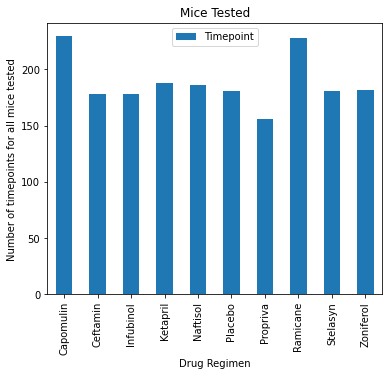

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Use DataFrame.plot() in order to create a bar chart of the data

data=pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Timepoint'].count())
data.head()
data.plot(kind="bar", figsize=(6,5)) 

# Set a title for the chart
plt.title("Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints for all mice tested")
plt.show()
plt.tight_layout()
plt.savefig('Barplot1')


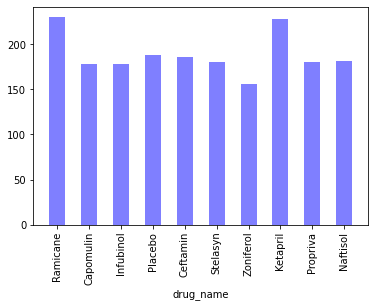

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_name=pd.Series(clean_df['Drug Regimen'].unique())
drug_name
total=pd.Series(clean_df.groupby(['Drug Regimen'])['Timepoint'].count())
total

x_axis = np.arange(len(drug_name))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name,  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.bar(drug_name,total, color='b', alpha=0.5, align="center",width=.5)

plt.xlabel('drug_name')
plt.savefig('Barplot2')

In [12]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


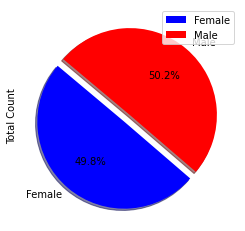

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#plot = name of the data frame .plot.pie (sumplots true)
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(4,4), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.savefig('Pieplot1')

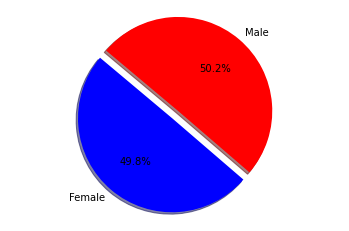

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")
plt.savefig('Pieplot2')

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
c_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin",:]
r_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
i_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ce_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
#Timepoint/ C/R/I/CE
c_max = c_df.groupby('Mouse ID').max()['Timepoint']
c_max_df = pd.DataFrame(c_max)
c_max_merge = pd.merge(c_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
#c_max_merge.head()

r_max = r_df.groupby('Mouse ID')['Timepoint'].max()
r_max_df = pd.DataFrame(r_max)
r_max_merge = pd.merge(r_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
#r_max_merge.head()

i_max = i_df.groupby('Mouse ID')['Timepoint'].max()
i_max_df = pd.DataFrame(i_max)
i_max_merge = pd.merge(i_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
#i_max_merge.head()

ce_max = ce_df.groupby('Mouse ID')['Timepoint'].max()
ce_max_df = pd.DataFrame(ce_max)
ce_max_merge = pd.merge(ce_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
ce_max_merge.head()


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
new_filtereddf=pd.concat([c_max_merge,r_max_merge,i_max_merge,ce_max_merge],axis=0)
new_filtereddf.head(len(new_filtereddf))

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,0,Ceftamin,Male,23,28,45.000000,0
21,x581,45,Ceftamin,Female,19,28,64.634949,3
22,x822,45,Ceftamin,Male,3,29,61.386660,3
23,y769,45,Ceftamin,Female,6,27,68.594745,4


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_df = new_filtereddf.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)

   
    

In [17]:
 # Locate the rows which contain mice on each drug and get the tumour volumes
        
    # add subset 
       
    # Determine outliers using upper and lower bounds
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#C outliers/ 

c_tumors = c_max_merge["Tumour Volume (mm3)"]

c_quartiles = c_tumors.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Capomulin potential outliers could be values below {c_lower_bound} and above {c_upper_bound} could be outliers.")

#R Outliers/ 
r_tumors = r_max_merge["Tumour Volume (mm3)"]

r_quartiles = r_tumors.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Ramicane potential outliers could be values below {r_lower_bound} and above {r_upper_bound} could be outliers.")

#I Outliers/
i_tumors = i_max_merge["Tumour Volume (mm3)"]

i_quartiles = i_tumors.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Infubinol potential outliers could be values below {i_lower_bound} and above {i_upper_bound} could be outliers.")

#CE Outliers/
ce_tumors = ce_max_merge["Tumour Volume (mm3)"]

ce_quartiles = ce_tumors.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq

ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Ceftamin potential outliers could be values below {ce_lower_bound} and above {ce_upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


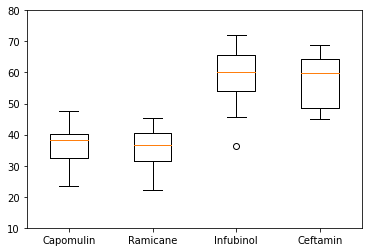

In [18]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

tumor_vols = [vol for vol in tumor_list_df['Tumour Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

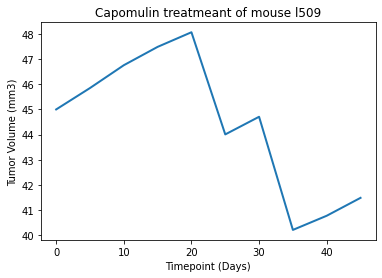

In [21]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
forline_df = c_df.loc[c_df["Mouse ID"] == "l509",:]
forline_df.head()
cap_data=pd.DataFrame(clean_df.loc[(clean_df['Drug Regimen'])=="Capomulin"])
x_axisTP = forline_df['Timepoint']
tumsiz = forline_df['Tumour Volume (mm3)']

plt.title("Capomulin treatmeant of mouse l509")
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

#new_line

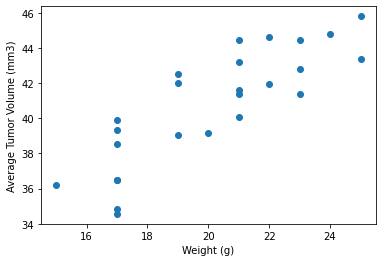

In [22]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


capavg = cap_data.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumour Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [24]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumour Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [25]:
#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

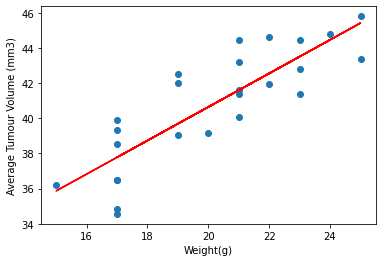

In [26]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumour Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumour Volume (mm3)')

plt.savefig('linearregression')
plt.show()